### J-Term 2017, Harvard GSD :
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, elliehan07@gmail.com <br>
Teaching Assistant: NJ Namju Lee, nj.namju@gmail.com <br>
Date/Time: Jan 9-12/ 1:00 - 3:00 p.m. <br>
Location: 20 Sumner/Room 1-D<br>
***

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor as KNN
%matplotlib inline

import pandas as pd
import numpy as np
import os, random
import sklearn
print sklearn.__version__

0.18.1


# Getting Data #

In [2]:
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

In [3]:
df =GetPandasFromFileCSV("data/_RentPriceTruliaMergeFinal.csv")
print df 
# print df.shape
# print df.head(3)
# print df.columns.values

       pixelPlant  pixelPole  pixelLake  pixelRoad  pixelGrass  pixelWall  \
0             0.0      0.000     60.990      2.671         0.0      2.116   
1             0.0      0.004     34.120      0.217         0.0      4.409   
2             0.0      0.000      0.000      0.000         0.0      0.000   
3             0.0      0.000     37.650      1.242         0.0      0.694   
4             0.0      0.000     37.650      1.242         0.0      0.694   
5             0.0      0.000     37.650      1.242         0.0      0.694   
6             0.0      0.000     37.650      1.242         0.0      0.694   
7             0.0      0.000     43.300      3.583         0.0      2.257   
8             0.0      0.000     37.650      1.242         0.0      0.694   
9             0.0      0.018     23.850      7.066         0.0      1.619   
10            0.0      0.018     23.850      7.066         0.0      1.619   
11            0.0      0.018     23.850      7.066         0.0      1.619   

In [4]:
df.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895,0.0,0,...,18.16,42.358550,-71.064780,37 Mount Vernon #4 Boston 02108,2108,3,2.0,1425,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104,0.0,0,...,27.81,42.356533,-71.070305,3 Byron St Boston 02108,2108,3,3.5,2500,232.2575,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896,0.0,0,...,0.00,42.355400,-71.061510,3 Winter Pl Boston 02108,2108,2,2.5,2250,209.03175,8500.0
3,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815,0.0,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #509 Boston 02108,2108,4,2.0,1325,123.096475,7200.0
4,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815,0.0,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #302 Boston 02108,2108,2,1.0,750,69.67725,3800.0


In [5]:
print df.shape
print df.columns.values

(13049, 47)
['pixelPlant' 'pixelPole' 'pixelLake' 'pixelRoad' 'pixelGrass' 'pixelWall'
 'pixelCar' 'propertiesAsses' 'pixelSea' 'numCraigslistHouse' 'pixelRiver'
 'pixelBus' 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'pixelFence'
 'walkSchool' 'walkMbta' 'energySiteEUI' 'pixelPerson' 'pixelTree'
 'pixelVan' 'walkPark' 'walkUniversity' 'pixelSidewalk' 'pixelGround'
 'pixelMountain' 'pixelPalmTree' 'pixelHouse' 'pixelBridge' 'pixelSign'
 'pixelRailing' 'pixelField' 'pixelWindow' 'pixelGrandstand'
 'numCraigslistRoom' 'pixelSky' 'Latitude' 'Longitude' 'Address' 'Zip'
 'RoomType' 'Bathrooms' 'SQFT' 'SQM' 'Price']


In [6]:
df.columns.values

array(['pixelPlant', 'pixelPole', 'pixelLake', 'pixelRoad', 'pixelGrass',
       'pixelWall', 'pixelCar', 'propertiesAsses', 'pixelSea',
       'numCraigslistHouse', 'pixelRiver', 'pixelBus', 'pixelCeiling',
       'pixelPath', 'pixelBuilding', 'crime', 'pixelFence', 'walkSchool',
       'walkMbta', 'energySiteEUI', 'pixelPerson', 'pixelTree', 'pixelVan',
       'walkPark', 'walkUniversity', 'pixelSidewalk', 'pixelGround',
       'pixelMountain', 'pixelPalmTree', 'pixelHouse', 'pixelBridge',
       'pixelSign', 'pixelRailing', 'pixelField', 'pixelWindow',
       'pixelGrandstand', 'numCraigslistRoom', 'pixelSky', 'Latitude',
       'Longitude', 'Address', 'Zip', 'RoomType', 'Bathrooms', 'SQFT',
       'SQM', 'Price'], dtype=object)

In [7]:
data = df.convert_objects(convert_numeric=True)

to_float = []
to_encode = []
for col in data.columns:
    if data[col].dtype =='object':
        to_encode.append(col);
    if data[col].dtype =='int64':
        to_float.append(col);
#     print col,data[col].dtype
        
# print to_float
# print "----------------------"
# print to_encode

for feature_name in to_float:
    data[feature_name] = data[feature_name].astype(float)

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Categorical columns for use in one-hot encoder
categorical = (data.dtypes.values != np.dtype('float64'))

# Encode all labels
data = data.apply(encode_categorical)

C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [8]:
for col in df.columns:
    print col,len(df[df[col].isnull()])

pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
propertiesAsses 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
Latitude 0
Longitude 0
Address 0
Zip 0
RoomType 995
Bathrooms 125
SQFT 8630
SQM 0
Price 27


# Deleting Null

In [9]:
def RemoveRowWithNAN(data):
    data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    return data.reset_index()

def RemoveColumnsWithNull(data, num):
    complete_cols = [column for column in data.columns if len(data[column][data[column].isnull()]) < num]
    return data[complete_cols]

def ReomveRowwithNANWithNum(data):
    data = data.dropna(thresh=None)
    return data

def GetNumpyColumnFromIndex(theDF):
    theD = pd.DataFrame(theDF.values);
    return theD.as_matrix()

def CheckPandasNAN(data):
    theResult = pd.isnull(data)
    count = 0;
    for i in theResult:
        if(i == True): count+=1
    return "the number of NAN is :" , count

print "before processing NAN : ", df.shape

data.dropna(axis=0,subset=['RoomType','Price','Bathrooms'],inplace=True)

## deal with the NAN data !!!!!!!!!!!!!!!!!!!!!!!!!!!!
df_new = RemoveRowWithNAN(data)

# df_new = df_new.convert_objects(convert_numeric=True)
df_new = ReomveRowwithNANWithNum(df_new)

print "after processing NAN :", df_new.shape


before processing NAN :  (13049, 47)
after processing NAN : (3753, 48)


# Filling Null

In [10]:
k=4
knntest = data[data['SQFT'].isnull()]
knntrain = data[data['SQFT'].isnull()==False]

xknn_train = knntrain[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
yknn_train = knntrain['SQFT'].values

xknn_test = knntest[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
neighbours = KNN(n_neighbors=k)
neighbours.fit(xknn_train, yknn_train)
yknn_test = neighbours.predict(xknn_test)

my_df = data.set_value( data['SQFT'].isnull(),'SQFT',yknn_test)


In [11]:
my_df.shape

(11569, 47)

In [12]:
for col in my_df.columns:
    print col,len(my_df[my_df[col].isnull()])

pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
propertiesAsses 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
Latitude 0
Longitude 0
Address 0
Zip 0
RoomType 0
Bathrooms 0
SQFT 0
SQM 0
Price 0


In [13]:
my_df.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895.0,0.0,0.0,...,18.16,42.358550,-71.064780,4755,2108.0,3.0,2.0,1425.0,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104.0,0.0,0.0,...,27.81,42.356533,-71.070305,4058,2108.0,3.0,3.5,2500.0,232.257500,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896.0,0.0,0.0,...,0.00,42.355400,-71.061510,4096,2108.0,2.0,2.5,2250.0,209.031750,8500.0
3,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6249,2108.0,4.0,2.0,1325.0,123.096475,7200.0
4,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6242,2108.0,2.0,1.0,750.0,69.677250,3800.0


# Selecting columns

In [14]:
my_df.columns.values

array(['pixelPlant', 'pixelPole', 'pixelLake', 'pixelRoad', 'pixelGrass',
       'pixelWall', 'pixelCar', 'propertiesAsses', 'pixelSea',
       'numCraigslistHouse', 'pixelRiver', 'pixelBus', 'pixelCeiling',
       'pixelPath', 'pixelBuilding', 'crime', 'pixelFence', 'walkSchool',
       'walkMbta', 'energySiteEUI', 'pixelPerson', 'pixelTree', 'pixelVan',
       'walkPark', 'walkUniversity', 'pixelSidewalk', 'pixelGround',
       'pixelMountain', 'pixelPalmTree', 'pixelHouse', 'pixelBridge',
       'pixelSign', 'pixelRailing', 'pixelField', 'pixelWindow',
       'pixelGrandstand', 'numCraigslistRoom', 'pixelSky', 'Latitude',
       'Longitude', 'Address', 'Zip', 'RoomType', 'Bathrooms', 'SQFT',
       'SQM', 'Price'], dtype=object)

In [16]:
# df_drop = my_df.drop('Address',1)
df_drop = my_df.drop('Address',1)


In [22]:
df_drop = df_drop.drop('Zip',1)
df_drop = my_df.drop('Address',1)

In [30]:
my = 0
my1 = 0.0

print type (float(my))
print type (my1)

<type 'float'>
<type 'float'>


In [24]:
df_drop = df_drop.drop('Zip',1)

In [25]:
df_drop.columns.values

array(['pixelPlant', 'pixelPole', 'pixelLake', 'pixelRoad', 'pixelGrass',
       'pixelWall', 'pixelCar', 'propertiesAsses', 'pixelSea',
       'numCraigslistHouse', 'pixelRiver', 'pixelBus', 'pixelCeiling',
       'pixelPath', 'pixelBuilding', 'crime', 'pixelFence', 'walkSchool',
       'walkMbta', 'energySiteEUI', 'pixelPerson', 'pixelTree', 'pixelVan',
       'walkPark', 'walkUniversity', 'pixelSidewalk', 'pixelGround',
       'pixelMountain', 'pixelPalmTree', 'pixelHouse', 'pixelBridge',
       'pixelSign', 'pixelRailing', 'pixelField', 'pixelWindow',
       'pixelGrandstand', 'numCraigslistRoom', 'pixelSky', 'Latitude',
       'Longitude', 'RoomType', 'Bathrooms', 'SQFT', 'SQM', 'Price'], dtype=object)

In [26]:
df_iloc = df_drop.iloc[:10000,7:]

In [32]:
print df_iloc.columns.values
print df_iloc.shape
print df_iloc.head()

['propertiesAsses' 'pixelSea' 'numCraigslistHouse' 'pixelRiver' 'pixelBus'
 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'pixelFence'
 'walkSchool' 'walkMbta' 'energySiteEUI' 'pixelPerson' 'pixelTree'
 'pixelVan' 'walkPark' 'walkUniversity' 'pixelSidewalk' 'pixelGround'
 'pixelMountain' 'pixelPalmTree' 'pixelHouse' 'pixelBridge' 'pixelSign'
 'pixelRailing' 'pixelField' 'pixelWindow' 'pixelGrandstand'
 'numCraigslistRoom' 'pixelSky' 'Latitude' 'Longitude' 'RoomType'
 'Bathrooms' 'SQFT' 'SQM' 'Price']
(10000, 38)
   propertiesAsses  pixelSea  numCraigslistHouse  pixelRiver  pixelBus  \
0      142585895.0       0.0                 0.0         0.0       0.0   
1      173725104.0       0.0                 0.0         0.0       0.0   
2      243090896.0       0.0                 0.0         0.0       0.0   
3      216929815.0       0.0                 0.0         0.0       0.0   
4      216929815.0       0.0                 0.0         0.0       0.0   

   pixelCeiling  pixelPath  pixe

In [33]:
df_iloc['pixelWater'] = df_iloc['pixelRiver'] + df_iloc['pixelSea']

In [34]:
df_iloc.head()

,propertiesAsses,pixelSea,numCraigslistHouse,pixelRiver,pixelBus,pixelCeiling,pixelPath,pixelBuilding,crime,pixelFence,...,numCraigslistRoom,pixelSky,Latitude,Longitude,RoomType,Bathrooms,SQFT,SQM,Price,pixelWater
0,142585895.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,4.0,0.0,...,0.0,18.16,42.358550,-71.064780,3.0,2.0,1425.0,132.386775,4250.0,0.0
1,173725104.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,14.0,0.0,...,0.0,27.81,42.356533,-71.070305,3.0,3.5,2500.0,232.257500,9500.0,0.0
2,243090896.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,0.0,...,0.0,0.00,42.355400,-71.061510,2.0,2.5,2250.0,209.031750,8500.0,0.0
3,216929815.0,0.0,0.0,0.0,0.0,0.0,0.804,0.0,35.0,0.0,...,0.0,24.04,42.356464,-71.061760,4.0,2.0,1325.0,123.096475,7200.0,0.0
4,216929815.0,0.0,0.0,0.0,0.0,0.0,0.804,0.0,35.0,0.0,...,0.0,24.04,42.356464,-71.061760,2.0,1.0,750.0,69.677250,3800.0,0.0


In [35]:
df_iloc.rename(columns={'pixelWater':'datawater'}, inplace=True)

In [36]:
df_iloc.head()

,propertiesAsses,pixelSea,numCraigslistHouse,pixelRiver,pixelBus,pixelCeiling,pixelPath,pixelBuilding,crime,pixelFence,...,numCraigslistRoom,pixelSky,Latitude,Longitude,RoomType,Bathrooms,SQFT,SQM,Price,datawater
0,142585895.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,4.0,0.0,...,0.0,18.16,42.358550,-71.064780,3.0,2.0,1425.0,132.386775,4250.0,0.0
1,173725104.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,14.0,0.0,...,0.0,27.81,42.356533,-71.070305,3.0,3.5,2500.0,232.257500,9500.0,0.0
2,243090896.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,0.0,...,0.0,0.00,42.355400,-71.061510,2.0,2.5,2250.0,209.031750,8500.0,0.0
3,216929815.0,0.0,0.0,0.0,0.0,0.0,0.804,0.0,35.0,0.0,...,0.0,24.04,42.356464,-71.061760,4.0,2.0,1325.0,123.096475,7200.0,0.0
4,216929815.0,0.0,0.0,0.0,0.0,0.0,0.804,0.0,35.0,0.0,...,0.0,24.04,42.356464,-71.061760,2.0,1.0,750.0,69.677250,3800.0,0.0


In [37]:
my_Names = ['Latitude','Longitude','crime','Bathrooms','SQFT','Price','energySiteEUI']

datacon = df_iloc[my_Names]
datacon.head()

,Latitude,Longitude,crime,Bathrooms,SQFT,Price,energySiteEUI
0,42.358550,-71.064780,4.0,2.0,1425.0,4250.0,0.0
1,42.356533,-71.070305,14.0,3.5,2500.0,9500.0,145.0
2,42.355400,-71.061510,19.0,2.5,2250.0,8500.0,263.7
3,42.356464,-71.061760,35.0,2.0,1325.0,7200.0,965.3
4,42.356464,-71.061760,35.0,1.0,750.0,3800.0,965.3


In [39]:
datacon['energySiteEUI'].describe()

count    10000.000000
mean        89.887831
std        187.041881
min          0.000000
25%          0.000000
50%          0.000000
75%        108.100000
max       1827.400000
Name: energySiteEUI, dtype: float64

# Visualizing data

In [ ]:
# energy = datacon['energySiteEUI']
# temp = energy.values
# plt.hist(temp,bins=50)
# plt.show()

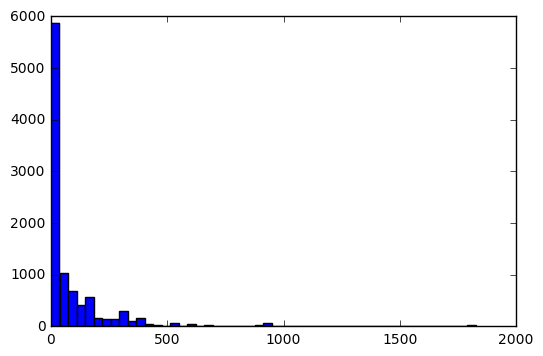

In [40]:
energy = datacon['energySiteEUI'].values

plt.hist(energy,bins =50)
plt.show()


In [ ]:
## Delete rows with zeros 
# dataNoZero = datacon[(datacon['energySiteEUI']==0) == False]
# dataNoZero.shape

In [41]:
dataNoZero = datacon[(datacon['energySiteEUI']==0) == False]

In [42]:
dataNoZero.shape

(4429, 7)

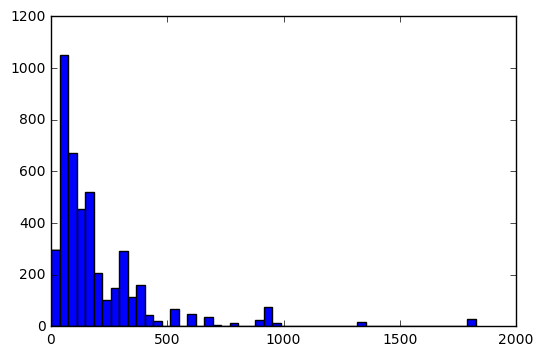

In [44]:
energy = dataNoZero['energySiteEUI']
temp = energy.values
plt.hist(temp,bins=50)
plt.show()

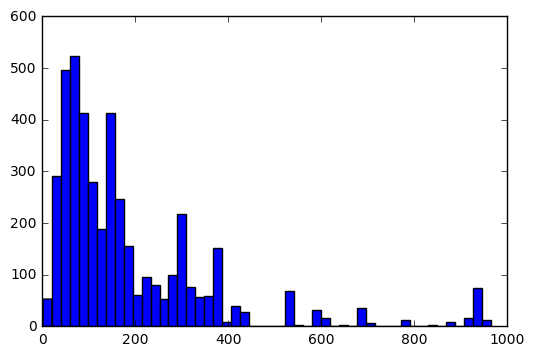

In [45]:
## Delete rows with Outliers 

dataNoOutliers = dataNoZero[(dataNoZero['energySiteEUI']>1000) == False]

energy = dataNoOutliers['energySiteEUI']
temp = energy.values
plt.hist(temp,bins=50)
plt.show()

In [46]:
dataNoOutliers['energySiteEUI'].describe()

count    4381.000000
mean      187.377131
std       183.744932
min         1.900000
25%        68.800000
50%       130.900000
75%       250.000000
max       965.300000
Name: energySiteEUI, dtype: float64

C:\Users\EllieHan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


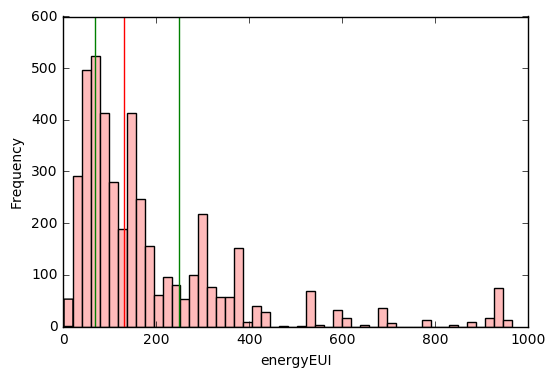

In [47]:
y = energy.values
plt.hist(y,bins = 50,color="#FFBBBB")
plt.axvline(68.800000,c="green")
plt.axvline(130.900000,c="red")
plt.axvline(250.000000,c="green")
plt.xlabel("energyEUI")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.legend()
plt.show()

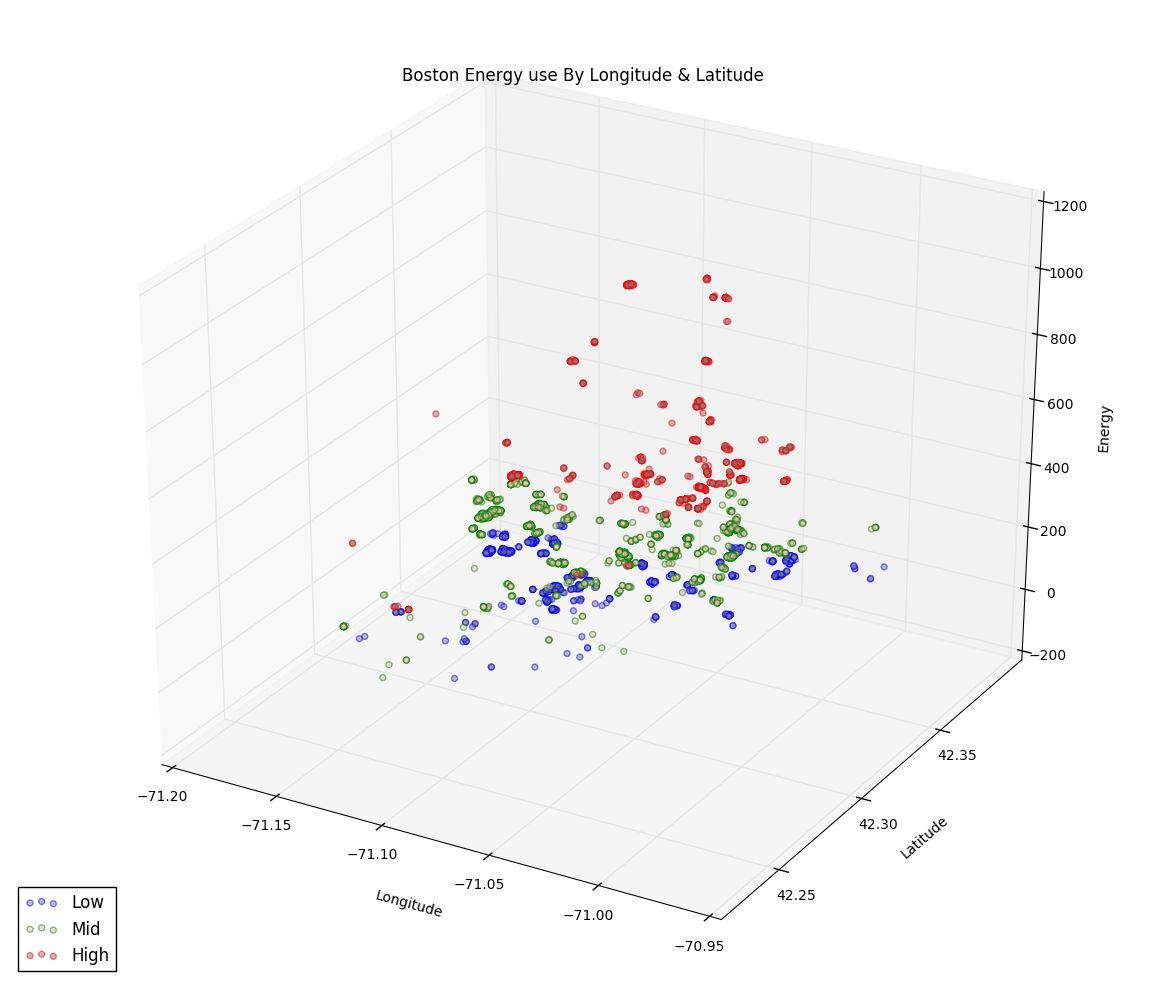

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors

fig = plt.figure(figsize=(35,10))

#Project onto axes: 1, 2, 3
ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

newData = pd.DataFrame()
newData['Longitude'] = dataNoOutliers['Longitude']
newData['Latitude'] = dataNoOutliers['Latitude']
newData['y'] = y

newData1 = newData[newData['y']<68.8]
newData2 = newData[(newData['y']>68.8 )&(newData['y']<250)]
newData3 = newData[250<newData['y']]


ax1.scatter(newData1['Longitude'], newData1['Latitude'],newData1['y'], label='Low' , facecolors = "gray",edgecolors = "blue",alpha = 0.5, s=18)
ax1.scatter(newData2['Longitude'], newData2['Latitude'],newData2['y'], label='Mid' , facecolors = "#FFBBBB",edgecolors = "green",alpha = 0.5, s=18)
ax1.scatter(newData3['Longitude'], newData3['Latitude'],newData3['y'], label='High' , facecolors = "gray",edgecolors = "red",alpha = 0.5, s=18)


ax1.set_xlabel('\n'+'\n' + 'Longitude')
ax1.set_ylabel('\n'+'\n' +'Latitude')
ax1.set_zlabel('\n'+'\n' +'Energy')
ax1.set_title('Boston Energy use By Longitude & Latitude')
ax1.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [49]:
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"

In [50]:
SavePandasToCSV(dataNoOutliers, "energy.csv")

'done!!'